## mRKS method

Please check the original paper:\
\[1\] [Ryabinkin, Kohut and Staroverov, PRL 115, 083001 (2015)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.115.083001) \
\[2\] [Ospadov, Ryabinkin and Staroverov, J. Chem. Phys. 146, 084103 (2017)](https://doi.org/10.1063/1.4975990) \
\[3\] [Staroverov, Ospadov, Advances in Quantum Chemistry, Volume 79 (2019)](https://doi.org/10.1016/bs.aiq.2019.04.002).\
Detailed examples is in Nobel_Gas examples.

In [1]:
import psi4
import matplotlib.pyplot as plt
import numpy as np

psi4.set_options({"save_jk" : True})
psi4.set_memory(int(2.50e9))
psi4.set_num_threads(4)
psi4.core.clean()

import n2v


  Memory set to   2.328 GiB by Python driver.
  Threads set to 4 by Python driver.


In [2]:
H2O = psi4.geometry( 
""" 
O 0.         0.         0.
H -0.4607    1.8327     0.
H 1.8897     0.         0.
noreorient
nocom
units bohr
symmetry c1
""" )

psi4.set_options({"reference" : "rhf",
                  "opdm": True,
                  "tpdm": True,
                  'DFT_SPHERICAL_POINTS': 266,  # Usually specify the DFT spherical grid is highly recommended.
                  'DFT_RADIAL_POINTS': 56,  # See [https://psicode.org/psi4manual/master/dft.html] for options.
                 })  # Spin-Restricted

# IMPORTANT NOTE: ONLY psi4.CIWavefunction or RHF is supported.
wfn = psi4.properties("detci/cc-pcvdz", return_wfn=True, molecule=H2O, properties=["dipole"])[1]

inverter = n2v.Inverter(wfn)

Run the calculation and plot in 1D:

In [3]:
x = np.linspace(-3,5,801)
y = [0]
z = [0]
grid, shape = inverter.generate_grids(x,y,z)

In [4]:
inverter.invert("mRKS", vxc_grid=grid, opt_max_iter=30, frac_old=0.8, 
                init="scan", sing=(1e-7, 1e-4, 1e-7, 1e-4))

The guide potential is changed to v_hartree.
Memory taken by ERI integral matrix and 2pdm is about: 0.015 GB.
vxchole quadrature double integral starts (43686 points): ...........

Totally 43686 grid points takes 781.35s with max 256 points in a block.
Iter: 1, Density Change: 1.96e-03, Eigenvalue Change: 3.80e+00, Potential Change: 5.28e-01.
Iter: 2, Density Change: 2.72e-05, Eigenvalue Change: 9.23e-02, Potential Change: 7.13e-03.
Iter: 3, Density Change: 9.56e-06, Eigenvalue Change: 1.24e-03, Potential Change: 4.48e-03.
Iter: 4, Density Change: 5.23e-06, Eigenvalue Change: 1.35e-03, Potential Change: 3.71e-03.
Iter: 5, Density Change: 3.11e-06, Eigenvalue Change: 1.40e-03, Potential Change: 3.52e-03.
Iter: 6, Density Change: 2.07e-06, Eigenvalue Change: 1.40e-03, Potential Change: 3.46e-03.
Iter: 7, Density Change: 1.54e-06, Eigenvalue Change: 1.39e-03, Potential Change: 3.43e-03.
Iter: 8, Density Change: 1.25e-06, Eigenvalue Change: 1.38e-03, Potential Change: 3.40e-03.
Iter: 9, De

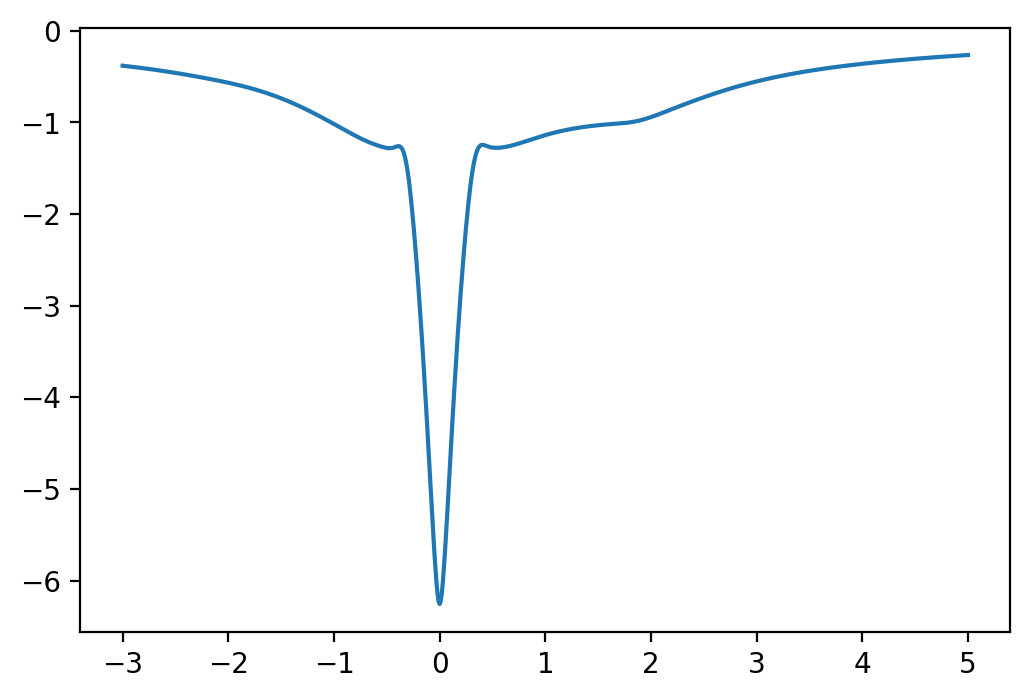

In [5]:
fig, ax = plt.subplots(dpi=200)
ax.plot(x, inverter.grid.vxc)

Re-run the calculation and plot it in 2D.

In [6]:
x = np.linspace(-5,5,501)
y = np.linspace(-5,5,501)
z = [0]
grid, shape = inverter.generate_grids(x,y,z)

In [7]:
inverter.invert("mRKS", vxc_grid=grid, opt_max_iter=30, frac_old=0.8, 
                init="scan", sing=(1e-7, 1e-4, 1e-7, 1e-4))

The guide potential is changed to v_hartree.
Memory taken by ERI integral matrix and 2pdm is about: 0.015 GB.
Iter: 1, Density Change: 1.96e-03, Eigenvalue Change: 3.80e+00, Potential Change: 5.28e-01.
Iter: 2, Density Change: 2.72e-05, Eigenvalue Change: 9.23e-02, Potential Change: 7.13e-03.
Iter: 3, Density Change: 9.56e-06, Eigenvalue Change: 1.24e-03, Potential Change: 4.48e-03.
Iter: 4, Density Change: 5.23e-06, Eigenvalue Change: 1.35e-03, Potential Change: 3.71e-03.
Iter: 5, Density Change: 3.11e-06, Eigenvalue Change: 1.40e-03, Potential Change: 3.52e-03.
Iter: 6, Density Change: 2.07e-06, Eigenvalue Change: 1.40e-03, Potential Change: 3.46e-03.
Iter: 7, Density Change: 1.54e-06, Eigenvalue Change: 1.39e-03, Potential Change: 3.43e-03.
Iter: 8, Density Change: 1.25e-06, Eigenvalue Change: 1.38e-03, Potential Change: 3.40e-03.
Iter: 9, Density Change: 1.08e-06, Eigenvalue Change: 1.36e-03, Potential Change: 3.37e-03.
Iter: 10, Density Change: 9.68e-07, Eigenvalue Change: 1.34e-0

In [8]:
inverter.grid.vxc.shape

(251001,)

Reshape it back to the real image matrix:

In [9]:
inverter.grid.vxc = inverter.grid.vxc.reshape(shape).squeeze()

In [10]:
inverter.grid.vxc.shape

(501, 501)

Let's plott the 2D image. Please notice the error in the corner.

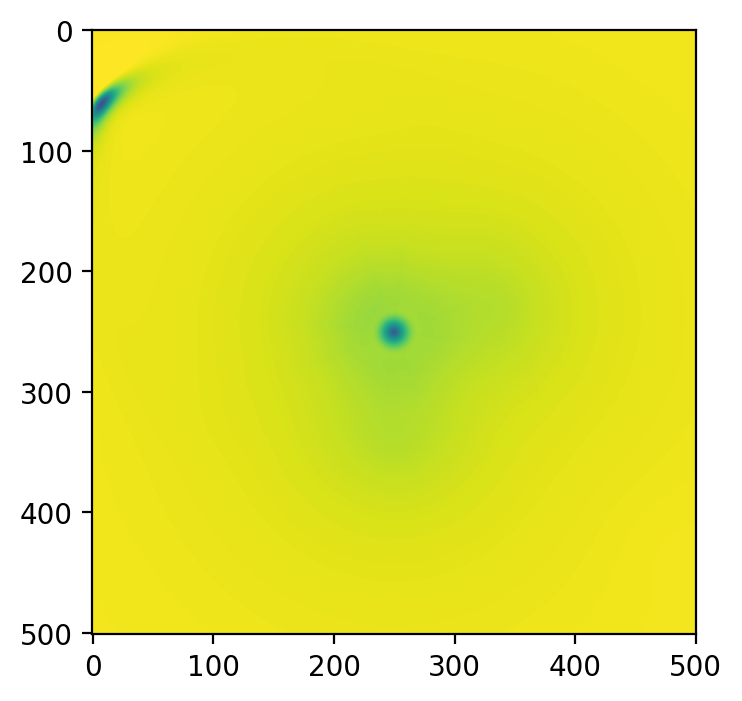

In [11]:
fig, ax = plt.subplots(dpi=200)
ax.imshow(inverter.grid.vxc, interpolation="bicubic", vmin=-9, vmax=0)